In [59]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
import random


In [60]:
churn_data = pd.read_csv('Churn_Modelling.csv',index_col=0)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [61]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [62]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [63]:
# Response variable
y = churn_data['Exited']

In [64]:
# Removing unimportant variables
X = churn_data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)

Dropping CustomerId and Surname from the dataset because it woudn't directly have an impact on whether the customer would churn or no.

In [65]:
# Correlation for Numerical data

num_cols = ['CreditScore' ,'Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
corr_num = churn_data[num_cols].corr()
corr_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


There is a weak negative correlation between Balance and NumOfProducts. Other than that we do not observer any significant correlation. So we can rule out Multicollinearity. 

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

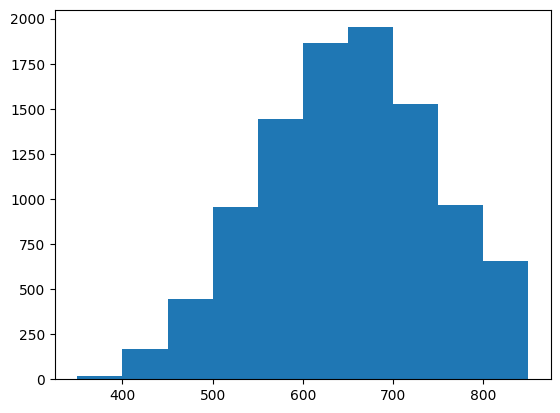

In [66]:
plt.hist(churn_data['CreditScore'])

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

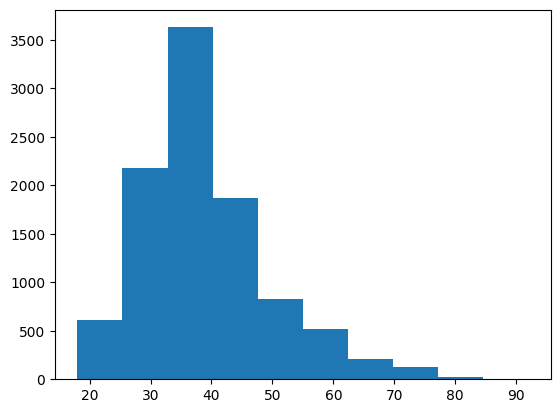

In [67]:
plt.hist(churn_data['Age'])

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

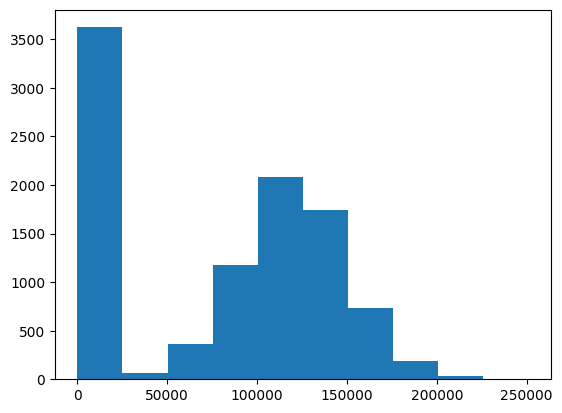

In [68]:
plt.hist(churn_data['Balance'])

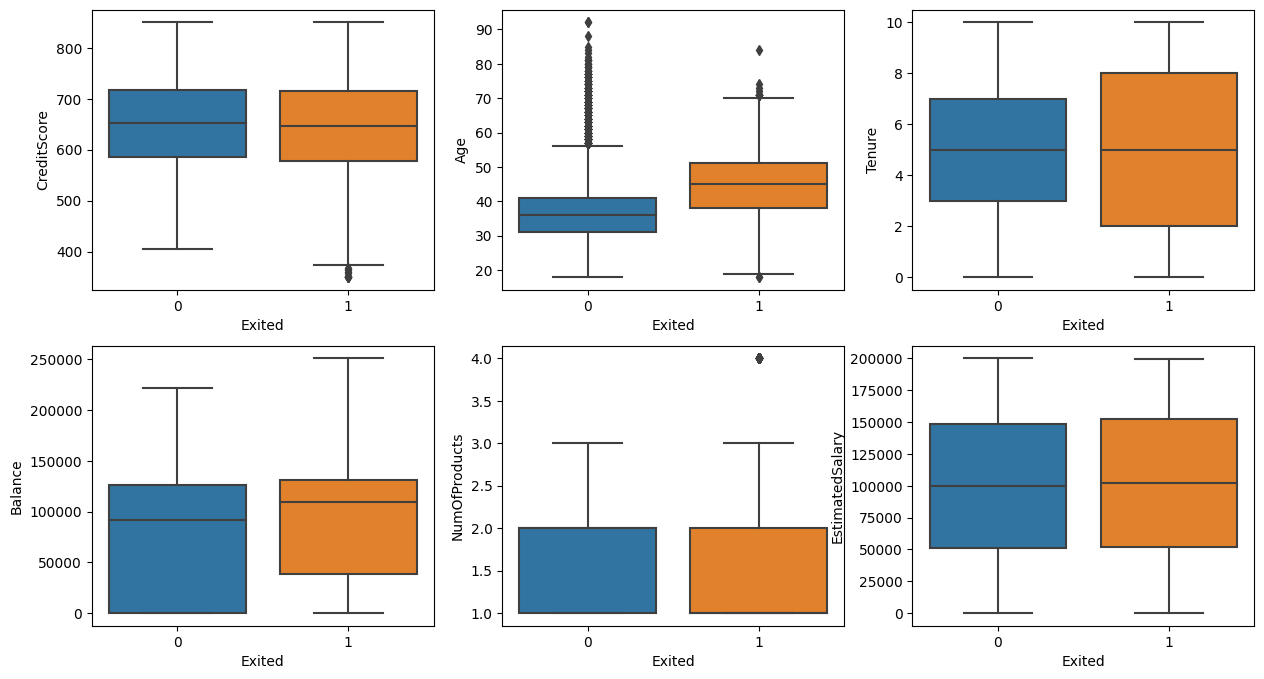

In [69]:
# Plotting each numerical variable against the Exited variable

fig,axs = plt.subplots(2,3, figsize=[15,8])
row_n = 0
col_n = 0
for col in num_cols:
    sns.boxplot(x='Exited', y=col, data=churn_data, ax=axs[row_n][col_n])
    col_n += 1
    if col_n == 3:
        row_n += 1
        col_n = 0

We can see that there are a lot of outliers for the age category while there are some outliers for creditScore and NumOfProducts. We would not remove these since they do not appear to have occured randomly but might carry some meaning in the data.

In [70]:
# Correlation for categorical data

cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
dummies = pd.get_dummies(churn_data[cat_cols])
corr_cat = dummies.corr()['Exited']
corr_cat

HasCrCard           -0.007138
IsActiveMember      -0.156128
Exited               1.000000
Geography_France    -0.104955
Geography_Germany    0.173488
Geography_Spain     -0.052667
Gender_Female        0.106512
Gender_Male         -0.106512
Name: Exited, dtype: float64

IsActiveMember, Geography_France, Geography_Spain and Gender_Male have weak negative corrleation with Exited while Geography_Germany and Gender_Female have weak positive correlation. HasCrCard has no significant corrleation

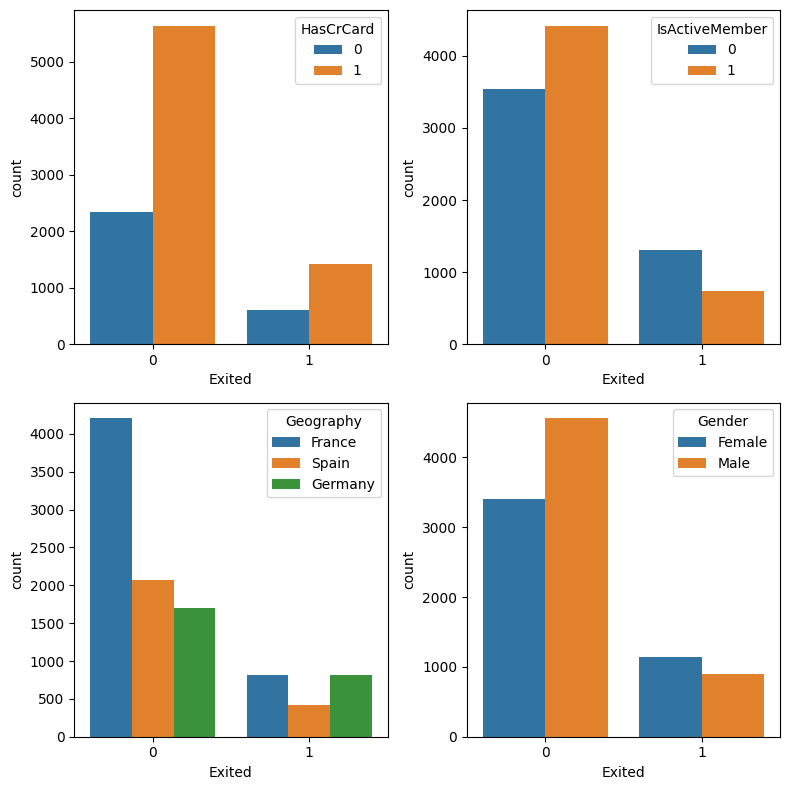

In [71]:
# Plotting each categorial variable against the Exited variable
fig,axs = plt.subplots(2,2, figsize = (8,8))

sns.countplot(x="Exited", hue='HasCrCard', data=churn_data, ax=axs[0, 0])
sns.countplot(x="Exited", hue='IsActiveMember', data=churn_data, ax=axs[0, 1])
sns.countplot(x="Exited", hue='Geography', data=churn_data,  ax=axs[1, 0])
sns.countplot(x="Exited", hue='Gender', data=churn_data, ax=axs[1, 1])

fig.tight_layout()    


# Model Building

In [93]:
# Splitting the data into test and train set
from sklearn import model_selection

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=516)

In [73]:
random.seed(42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[:])
X_train[:] = scaler.transform(X_train[:])
X_test[:] = scaler.transform(X_test[:])

## 1. Logistic Regression

In [74]:
random.seed(42)

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)
lr_model.predict(X_test)

lr_accuracy = lr_model.score(X_test, y_test)
print("Accuracy score for Logistic Regression Model is:", lr_accuracy)


Accuracy score for Logistic Regression Model is: 0.816


### GridSearchCV

In [75]:
random.seed(42)

from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty':('l2','l1')
}
gridsearch_lr = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=10)
gridsearch_lr.fit(X_train, y_train)

lr_gs_accuracy = gridsearch_lr.best_score_
print("Accuracy score for Logistic Regression Model with GridSearchCV is:", lr_gs_accuracy)


Accuracy score for Logistic Regression Model with GridSearchCV is: 0.8059999999999998


### Model Performance

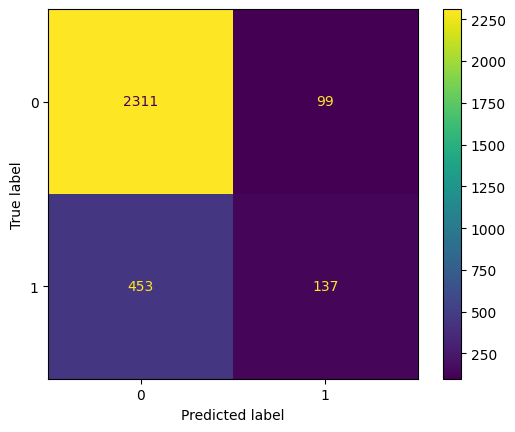

In [76]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, lr_model.predict(X_test))
plt.show()

False Negative: 453
False Positive: 99

In [77]:
# Recall
random.seed(42)

parameters = {
    'C': np.logspace(-3, 3, 7),
    'penalty':('l2','l1')
}
gridsearch_lr = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, scoring="recall", cv=10)
gridsearch_lr.fit(X_train, y_train)

lr_gs_recall = gridsearch_lr.best_score_
print("Recall score for Logistic Regression with GridSearchCV is:", lr_gs_recall)


Recall score for Logistic Regression with GridSearchCV is: 0.21005268199233718


In [92]:
from sklearn.metrics import f1_score

lr_f1= f1_score(y_test, gridsearch_lr.best_estimator_.predict(X_test))
print("F1 score for Logistic Regression model with GridSearchCV is:", lr_f1)


F1 score for Logistic Regression model with GridSearchCV is: 0.33171912832929784


## 2. Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
rf_model.predict(X_test)

rf_accuracy= rf_model.score(X_test, y_test)
print("Accuracy score for Random Forest is:", rf_accuracy)


Accuracy score for Random Forest is: 0.8583333333333333


### GridSearchCV

In [79]:
random.seed(42)

parameters = {
    'n_estimators' : range(40, 180, 20),
    'max_depth': [1,5,10,15,20]
}
gridsearch_rf = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
gridsearch_rf.fit(X_train, y_train)

rf_gs_accuracy = gridsearch_rf.best_score_
print("Accuracy score for Random Forest with GridSearchCV is:", rf_gs_accuracy)


Accuracy score for Random Forest with GridSearchCV is: 0.8640000000000001


### Model Performance

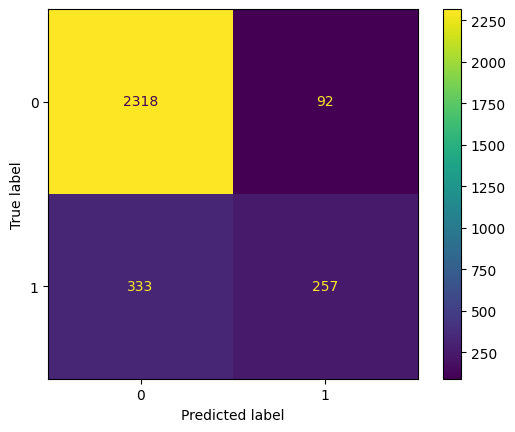

In [80]:
# Condusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_model.predict(X_test))
plt.show()

False Negative: 333
False Positive: 92

In [81]:
from sklearn.metrics import classification_report

result = classification_report(y_test,gridsearch_rf.predict(X_test))
print(result)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2410
           1       0.78      0.41      0.54       590

    accuracy                           0.86      3000
   macro avg       0.83      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [82]:
print("Recall score for Random Forest is: 0.41")

Recall score for Random Forest is: 0.43


In [83]:
from sklearn.metrics import f1_score

rf_f1 = f1_score(y_test, rf_model.predict(X_test))
print("F1 score for Random Forest is:", rf_f1)

F1 score for Random Forest is: 0.5473908413205538


## 3. XGBoost

In [84]:
random.seed(42)

from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
xgb_model.predict(X_test)

xgb_accuracy = xgb_model.score(X_test, y_test)
print("Accuracy score for XGBoost model is:", xgb_accuracy)


Accuracy score for XGBoost model is: 0.86


### GridSearchCV

In [85]:
random.seed(42)

parameters = {
    'eta': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [4, 5, 6, 7],
    'max_delta_step': [1, 2, 3]
}

gridsearch_xgb = GridSearchCV(XGBClassifier(), 
                         parameters,
                         cv=5)

gridsearch_xgb.fit(X_train, y_train)

xgb_gs_accuracy = gridsearch_xgb.best_score_
print("Accuracy score for XGBoost model with GridSearchCV is:", xgb_gs_accuracy)


Accuracy score for XGBoost model with GridSearchCV is: 0.8664285714285714


### Model Performance

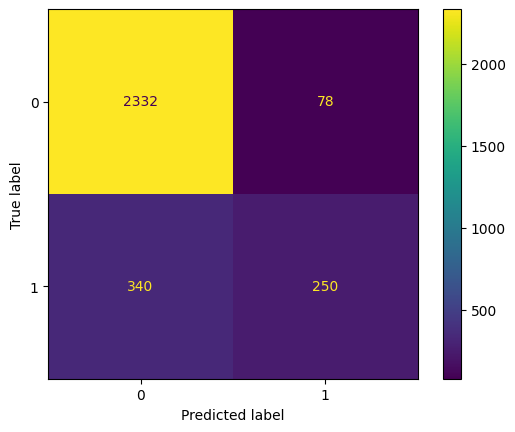

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, gridsearch_xgb.best_estimator_.predict(X_test))
plt.show()

False Negative: 340
False Positive: 78

In [87]:
from sklearn import metrics

xgb_gs_recall = metrics.recall_score(y_test, gridsearch_xgb.best_estimator_.predict(X_test))
print("Recall score for XGBoost model with GridSearchCV is:", xgb_gs_recall)


Recall score for XGBoost model with GridSearchCV is: 0.423728813559322


In [88]:
from sklearn.metrics import f1_score

xgb_f1= f1_score(y_test, gridsearch_xgb.best_estimator_.predict(X_test))
print("F1 score for XGBoost model with GridSearchCV is:", xgb_f1)


F1 score for XGBoost model with GridSearchCV is: 0.5446623093681917


## ROC Curves

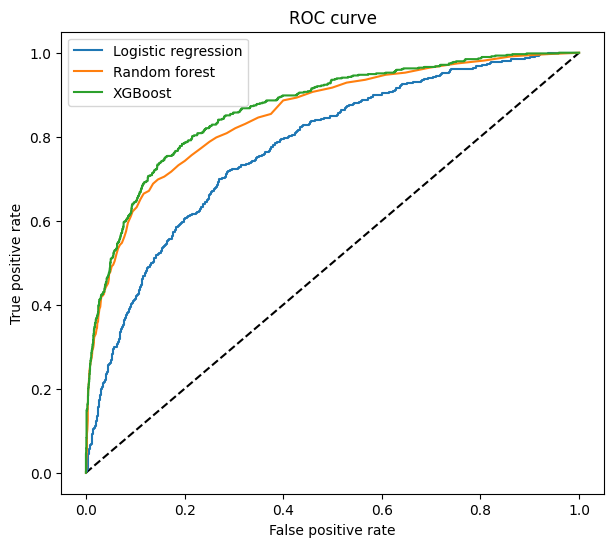

In [89]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(7, 6))

# logistic regression
y_pred_lr = lr_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

# random forest
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.plot(fpr_rf, tpr_rf, label='Random forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

# XGBoost
y_pred_xgb = gridsearch_xgb.best_estimator_.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

print()


In [90]:
print("AUC score for logistic regression: " + str(metrics.auc(fpr_lr,tpr_lr)))
print("AUC score for random forest: " + str(metrics.auc(fpr_rf,tpr_rf)))
print("AUC score for XGBoost: " + str(metrics.auc(fpr_xgb,tpr_xgb)))

AUC score for logistic regression: 0.7743146494127576
AUC score for random forest: 0.852442858147549
AUC score for XGBoost: 0.8682038118011112


1. We see that the Accuracy for Random Forest (0.864) and XGBoost (0.866) is almost comparable where as Logistic regression has lower accuracy (0.805).
2. The recall is more for XGBoost (0.423) as compared to Random Forest (0.41) while Logistic regression it is much lower (0.21).
3. From the AUC curve we can see that among Logistic Regression, Random Forest and XGBoost, XGBoost the best AUC score 0.868.
4. The False Positive for XGBoost is lower than than for Random Forest while the False Negative is lower for Random Forest.
5. The F1 scores for Random Forest(0.547) and XGBoost(0.544) do not have a significant difference.

In the case of customer churn prediction, false positives can result in wasted retention efforts for customers who were never at risk of churning, while false negatives can result in lost customers who were not identified as at-risk and therefore not targeted with retention efforts. Hence, both false positives and false negatives can have significant consequences depending on the context of the classification problem

So based on the business context and comparison of all the measures, we can choose between Random Forest and XGBoost.